The condition number under the 2-norm is 84365.3


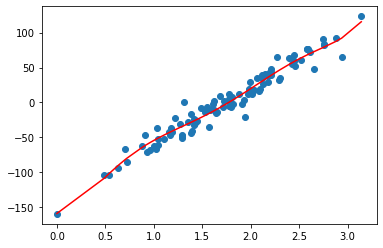

In [22]:
import numpy as np
from get_data import get_data

df = get_data('linear')

x_min = min(df['x'])
x_max = max(df['x'])
from math import pi
df['x_trans'] = ( df['x'] - x_min)/(x_max-x_min)* pi

from math import cos
from math import sqrt

model_switch = 'x'

num_rows = len(df.index)


num_weights = 7

if model_switch == 'cos':
    df['cos0'] = df['x_trans'].apply(lambda x: cos(0*x) / sqrt(num_rows))
else:
    df['cos0'] = df['x_trans'].apply(lambda x: x ** 0 / sqrt(num_rows))

for i in range(1,num_weights):
    if model_switch == 'cos':
        df[f'cos{i}'] = df['x_trans'].apply(lambda x: sqrt(2)*cos(i*x) / sqrt(num_rows))
    else:
        df[f'cos{i}'] = df['x_trans'].apply(lambda x: sqrt(2)* x ** i / sqrt(num_rows))

A = df[[f"cos{x}" for x in range(0,num_weights)]].values
b = df['y'].values

w = np.linalg.solve(np.transpose(A) @ A, np.transpose(A) @ b)

def f(row):
    return sum([row[f'cos{x}'] * w[x] for x in range(0,num_weights)])

df['pred'] = df.apply(f, axis=1)

from numpy.linalg import cond

print(f"The condition number under the 2-norm is {round(cond(A),1)}")

import matplotlib.pyplot as plt



plt.plot(df['x_trans'],df['pred'], c= "r")
plt.scatter(df['x_trans'],df['y'])
plt.savefig('curve.png')

plt.show()
